In [1]:
import sys
sys.path.append('..')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sfp_nsdsyn import *
import warnings
import itertools
warnings.filterwarnings("ignore", category=UserWarning)
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2

In [2]:
nsd_dir = '/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/'
fs_dir = '/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsddata/freesurfer'
# inputs
subj = utils.sub_number_to_string(1, dataset='nsdsyn')
hemi = 'lh'
nsd_subj_list = [utils.sub_number_to_string(sn, 'nsdsyn') for sn in np.arange(1,9)]
design_mat = os.path.join(nsd_dir, 'nsddata', 'experiments', 'nsdsynthetic', 'nsdsynthetic_expdesign.mat')
betas = os.path.join(nsd_dir, 'nsddata_betas', 'ppdata', subj, 'nativesurface', prep._get_beta_folder_name(3), f'{hemi}.betas_nsdsynthetic.hdf5')
stim_info = os.path.join(nsd_dir, 'nsdsyn_stim_description_corrected.csv')
rois = [os.path.join(fs_dir, subj, 'label', f'{hemi}.prf-{roi}.mgz')
        for roi in ["visualrois"]]
rois_vals = [[1,2],[1,2,3,4,5]]
prfs = [os.path.join(fs_dir, subj, 'label', f'{hemi}.prf{prf_param}.mgz')
        for prf_param in ["eccentricity", "angle", "size"]]

# Load stimulus information (image number, w_a, w_r, etc)
This contains 112 spiral images and their corresponding information.

# Load beta values within V1

In [3]:
 tmp = pd.read_csv(f'/Volumes/server/Projects/sfp_nsd/derivatives/dataframes/nsdsyn/model/corrected/dset-nsdsyn_sub-{subj}_roi-V1_vs-pRFsize_tavg-False.csv')

In [5]:
tmp.voxel.nunique()

2307

In [29]:
corrected_df = pd.DataFrame({})
for subj in nsd_subj_list:
     tmp = pd.read_csv(f'/Volumes/server/Projects/sfp_nsd/derivatives/dataframes/nsdsyn/model/corrected/dset-nsdsyn_sub-{subj}_roi-V1_vs-pRFsize_tavg-False.csv')
     corrected_df = pd.concat((corrected_df, tmp), axis=0)
     corrected_df = corrected_df.query('1<eccentricity < 2')
corrected_df = corrected_df.groupby(['stim_idx','class_idx','sub','freq_lvl']).mean().reset_index()

uncorrected_df = pd.DataFrame({})
for subj in nsd_subj_list:
     tmp = pd.read_csv(f'/Volumes/server/Projects/sfp_nsd/derivatives/dataframes/nsdsyn/model/uncorrected/dset-nsdsyn_sub-{subj}_roi-V1_vs-pRFsize_tavg-False.csv')
     uncorrected_df = pd.concat((uncorrected_df, tmp), axis=0)
     uncorrected_df = uncorrected_df.query('1 <eccentricity < 2')
uncorrected_df = uncorrected_df.groupby(['stim_idx','class_idx','sub','freq_lvl']).mean().reset_index()

In [30]:
corrected_df['df_type'] = 'corrected'
uncorrected_df['df_type'] = 'uncorrected'
df = pd.concat((corrected_df, uncorrected_df), axis=0)

# Plot the average beta values of V1 for each image (old vs new) 

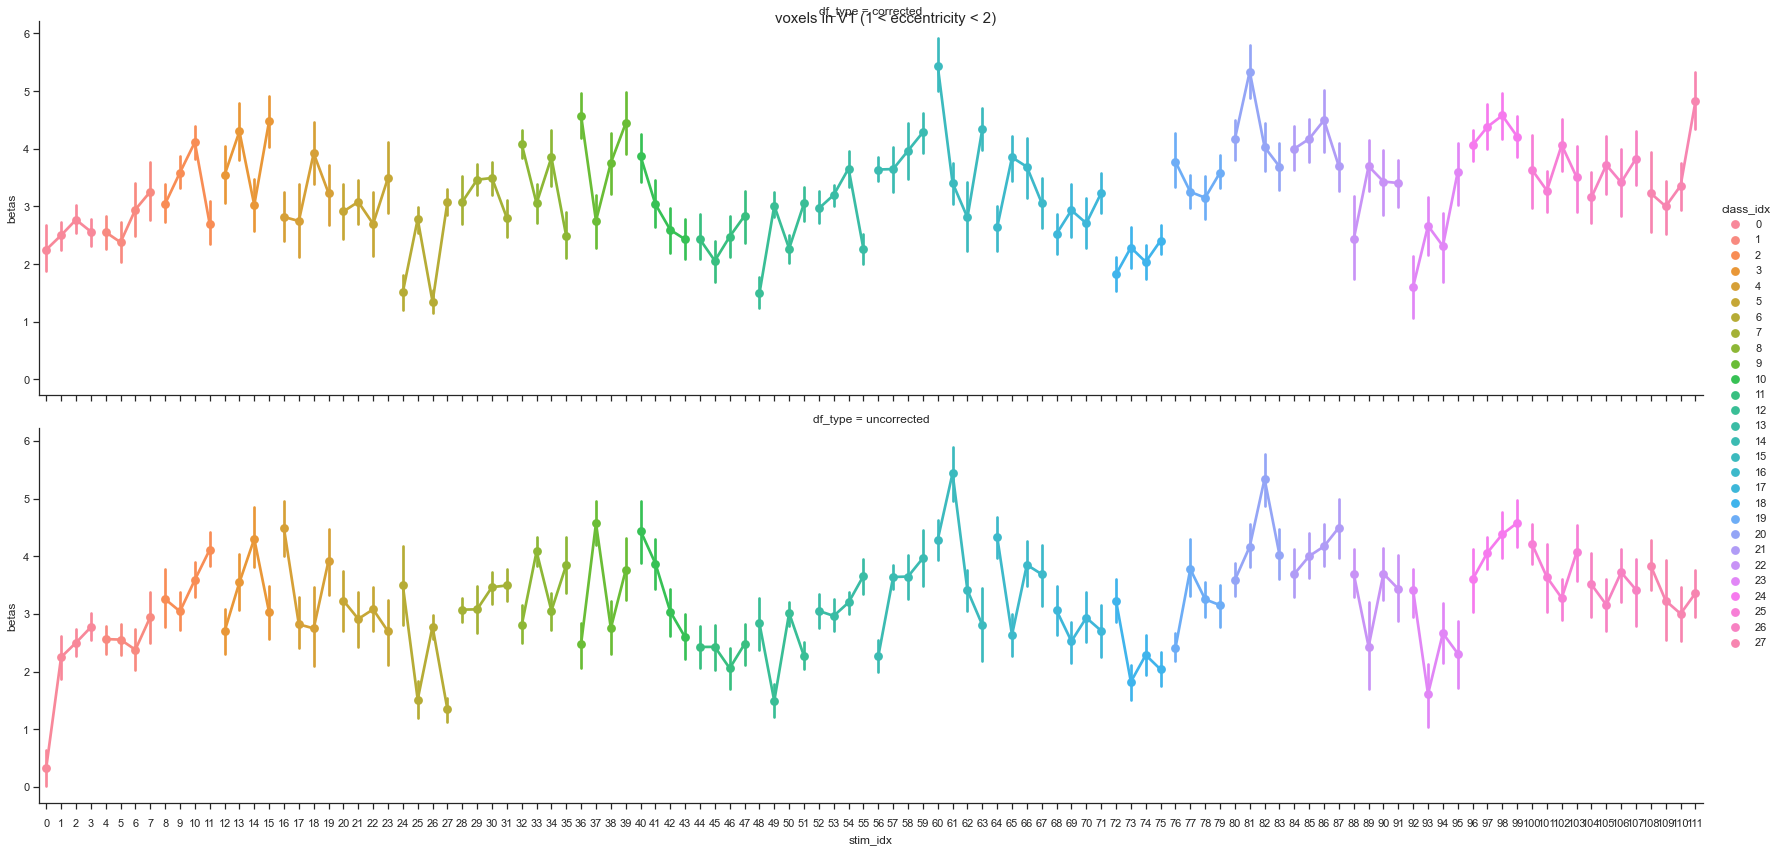

In [36]:
sns.set_theme(style="ticks")
g = sns.catplot(data=df, row='df_type', 
                x='stim_idx', y='betas', kind='point', sharey=True, sharex=True, 
                estimator='mean', errorbar=('ci', 68), height=6, aspect=4, hue='class_idx')
g.fig.suptitle('voxels in V1 (1 < eccentricity < 2)')
plt.savefig('/Volumes/server/Projects/sfp_nsd/derivatives/figures/tmp/uncorrected_vs_corrected.png')

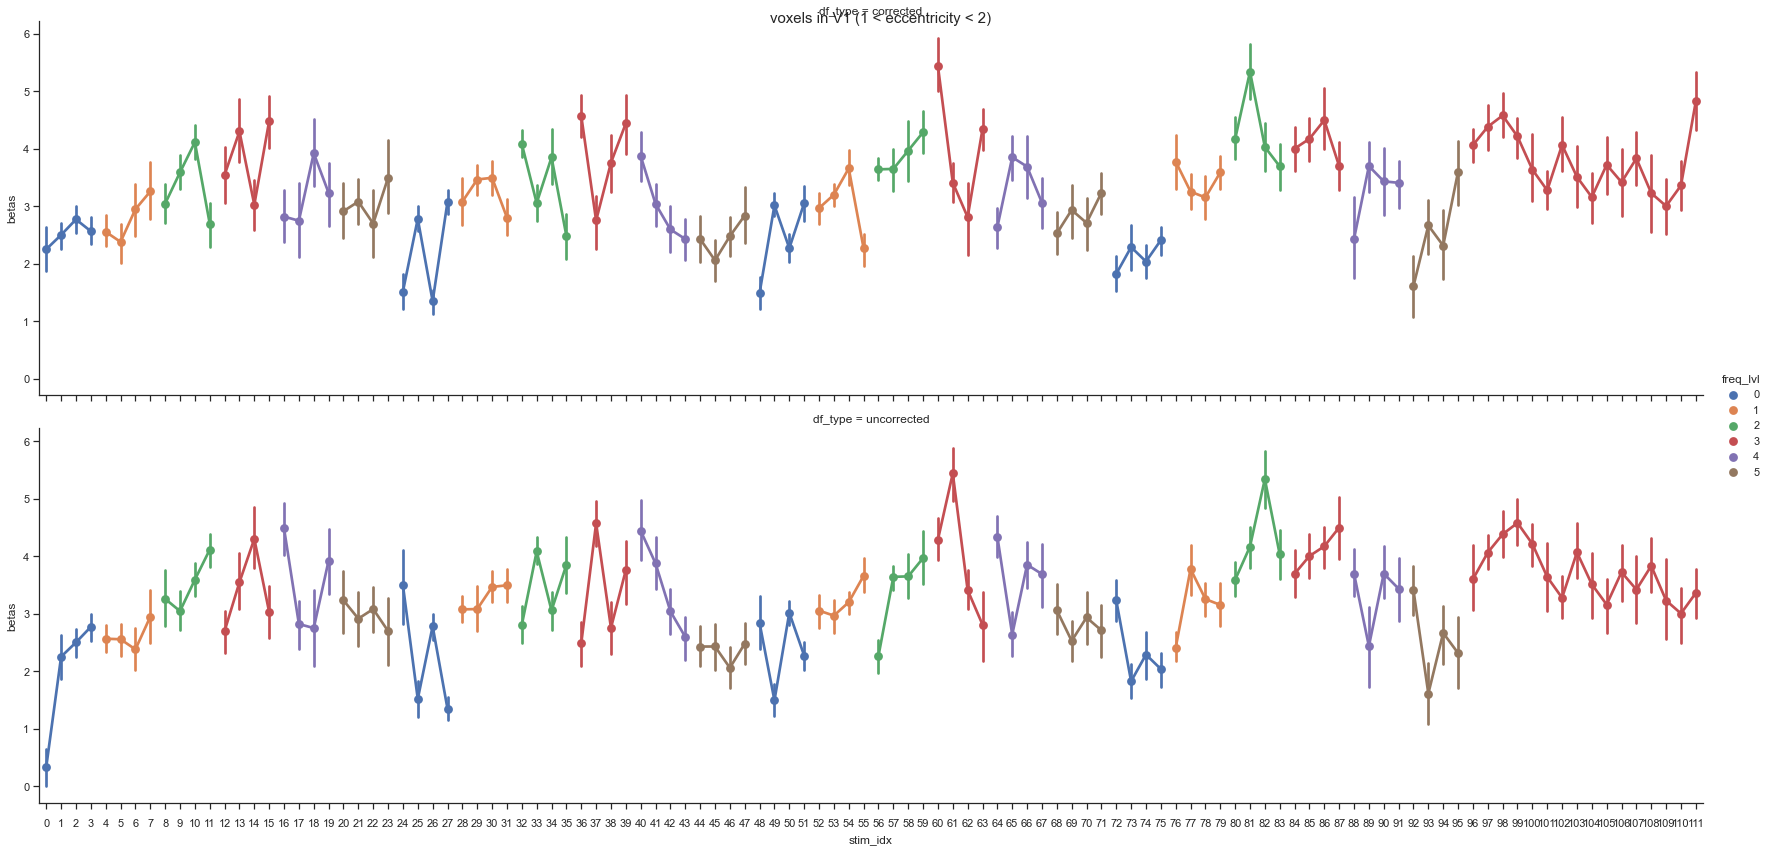

In [37]:
sns.set_theme(style="ticks")
g = sns.catplot(data=df, row='df_type', 
                x='stim_idx', y='betas', kind='point', sharey=True, sharex=True, 
                estimator='mean', errorbar=('ci', 68), height=6, aspect=4, hue='freq_lvl')
g.fig.suptitle('voxels in V1 (1 < eccentricity < 2)')
plt.savefig('/Volumes/server/Projects/sfp_nsd/derivatives/figures/tmp/freq_lvl_uncorrected_vs_corrected.png')
